# Load libraries

In [1]:
## load libraries

from pyDOE import *
from scipy.stats.distributions import norm
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import qmc
import tensorflow as tf
import pandas as pd

# Generate dataset

In [2]:
## set options for generating dataset

data_nums = 100
data_dims = 1
data_lb = 0
data_ub = 10

In [3]:
sampler = qmc.LatinHypercube(d=data_dims)

x_data = sampler.random(n=data_nums)
x_data = qmc.scale(x_data, data_lb, data_ub)
x_data

array([[8.02511341],
       [5.73477782],
       [1.83817286],
       [0.96212522],
       [3.40296307],
       [1.91326646],
       [0.79773162],
       [2.32415082],
       [2.13385612],
       [4.39680565],
       [6.39858149],
       [1.3411255 ],
       [4.00321056],
       [7.60231514],
       [1.57272865],
       [6.18367926],
       [8.49946693],
       [7.32873079],
       [3.53267771],
       [5.92311668],
       [3.94222869],
       [6.84869725],
       [0.1274576 ],
       [6.95751005],
       [1.74176835],
       [9.41796523],
       [0.55344718],
       [0.60858937],
       [0.80827446],
       [3.09395367],
       [5.09802349],
       [0.26983426],
       [5.40647897],
       [7.52326793],
       [2.06745744],
       [6.08527507],
       [4.2971607 ],
       [3.21814206],
       [8.79444379],
       [2.91581564],
       [2.46081088],
       [4.59573029],
       [4.10795196],
       [8.63990745],
       [1.01393527],
       [1.46205145],
       [5.21377335],
       [5.634

In [4]:
## generate y dataset

# define function
def main_func(x):
    y = [(xi-1)*(xi-5)*(xi-9) for xi in x]
    return np.array(y)

y_data = main_func(x_data)
print(np.shape(y_data))
print(y_data)

(100, 1)
[[-20.71806045]
 [-11.35973976]
 [ 18.97997128]
 [ -1.22926122]
 [ 21.47930517]
 [ 19.97757421]
 [ -6.97181342]
 [ 23.65405497]
 [ 22.31355851]
 [  9.43164128]
 [-19.64163619]
 [  9.55931223]
 [ 14.95823177]
 [-24.01404939]
 [ 14.57896492]
 [-17.28041918]
 [-13.13605817]
 [-24.63101563]
 [ 20.31796087]
 [-13.98323821]
 [ 15.74082168]
 [-23.26089755]
 [-37.72161245]
 [-23.81928455]
 [ 17.54207976]
 [ 15.54424306]
 [-16.77165027]
 [-14.4235326 ]
 [ -6.58336899]
 [ 23.57205094]
 [ -1.56743398]
 [-30.15228983]
 [ -6.43650295]
 [-24.30694011]
 [ 21.70138425]
 [-16.08614025]
 [ 10.89823813]
 [ 22.8522965 ]
 [ -6.07944392]
 [ 24.29361877]
 [ 24.25565133]
 [  6.40224397]
 [ 13.56292171]
 [-10.01365386]
 [  0.44360093]
 [ 12.32239193]
 [ -3.41060432]
 [ -9.89379187]
 [ 11.17933429]
 [-16.618843  ]
 [ 24.50608131]
 [-22.77630592]
 [ 30.0652132 ]
 [-17.8334898 ]
 [ 24.58430957]
 [-18.31046161]
 [-23.43060381]
 [-43.70165335]
 [ 23.15133142]
 [ -0.62425561]
 [-12.86419162]
 [  4.80066607]

In [5]:
xy_data = np.concatenate((x_data,y_data),axis=1 )
print(xy_data)

xy_pd = pd.DataFrame(xy_data)
xy_pd.to_csv('dataset.csv')

[[ 8.02511341e+00 -2.07180605e+01]
 [ 5.73477782e+00 -1.13597398e+01]
 [ 1.83817286e+00  1.89799713e+01]
 [ 9.62125222e-01 -1.22926122e+00]
 [ 3.40296307e+00  2.14793052e+01]
 [ 1.91326646e+00  1.99775742e+01]
 [ 7.97731621e-01 -6.97181342e+00]
 [ 2.32415082e+00  2.36540550e+01]
 [ 2.13385612e+00  2.23135585e+01]
 [ 4.39680565e+00  9.43164128e+00]
 [ 6.39858149e+00 -1.96416362e+01]
 [ 1.34112550e+00  9.55931223e+00]
 [ 4.00321056e+00  1.49582318e+01]
 [ 7.60231514e+00 -2.40140494e+01]
 [ 1.57272865e+00  1.45789649e+01]
 [ 6.18367926e+00 -1.72804192e+01]
 [ 8.49946693e+00 -1.31360582e+01]
 [ 7.32873079e+00 -2.46310156e+01]
 [ 3.53267771e+00  2.03179609e+01]
 [ 5.92311668e+00 -1.39832382e+01]
 [ 3.94222869e+00  1.57408217e+01]
 [ 6.84869725e+00 -2.32608976e+01]
 [ 1.27457603e-01 -3.77216125e+01]
 [ 6.95751005e+00 -2.38192846e+01]
 [ 1.74176835e+00  1.75420798e+01]
 [ 9.41796523e+00  1.55442431e+01]
 [ 5.53447177e-01 -1.67716503e+01]
 [ 6.08589369e-01 -1.44235326e+01]
 [ 8.08274462e-01 -6

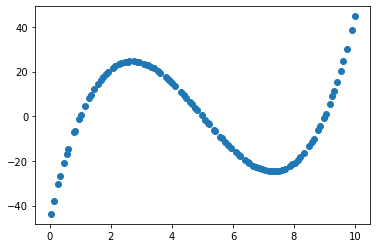

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)